####**Import the required libraries**

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####**Import test dataset**

In [102]:
test=pd.read_csv("testKNN.txt")
test.head()

,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


####**Name the column to the dataset**

In [103]:
test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test.head(3)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2


####**Drop ID as it is irrelevant**

In [104]:
test = test.drop('ID', axis=1)
test.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2


####**Import train dataset**

In [105]:
train=pd.read_csv("trainKNN.txt")
train.head(3)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


####**Name the column in the dataset**

In [106]:
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train.head(3)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


####**Drop ID column as it is irrelevent**

In [107]:
train = train.drop('ID', axis=1)
train.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


####Getting the shape in terms of rows and column

In [108]:
test.shape

(17, 10)

####Getting the information of test dataset Non null count and datatypes

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             17 non-null     float64
 1   Na             17 non-null     float64
 2   Mg             17 non-null     float64
 3   Al             17 non-null     float64
 4   Si             17 non-null     float64
 5   K              17 non-null     float64
 6   Ca             17 non-null     float64
 7   Ba             17 non-null     float64
 8   Fe             17 non-null     float64
 9   Type of glass  17 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 KB


####Getting null count

In [110]:
test.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

####Getting the type of the data

In [111]:
test.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

####Discriptive analysis of data

In [112]:
test.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.518991,13.805294,1.769412,1.37000,72.849412,0.257647,9.437647,0.310000,0.128235,4.176471
std,0.002810,1.101659,1.744772,0.58676,0.910415,0.272799,1.419386,0.631951,0.169567,2.157409
min,1.511150,12.850000,0.000000,0.34000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,1.517110,13.000000,0.000000,0.90000,72.200000,0.000000,8.620000,0.000000,0.000000,2.000000
50%,1.519340,13.380000,1.610000,1.40000,72.720000,0.160000,8.990000,0.000000,0.000000,5.000000
75%,1.520650,14.230000,3.540000,1.94000,73.390000,0.560000,10.170000,0.150000,0.240000,6.000000
max,1.523000,17.380000,3.780000,2.17000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


####**Cheching the outliers in test dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


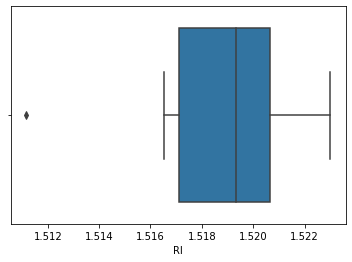

In [113]:
sns.boxplot(test["RI"])
#,Na,Si,Ca,Ba

####**Find the IQR**

In [114]:
percentile25 = test['RI'].quantile(0.25)
percentile75 = test['RI'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.51711
75th percentile of the data is  1.52065
IQR : 0.0035400000000000986


####**Finding the limits**

In [115]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

1.5259600000000002
1.5117999999999998


####**Apply capping to remove outliers**

In [116]:
test['RI'] = np.where(
    test['RI']>max_value,
    max_value,
    np.where(
        test['RI']<min_value,
        min_value,
        test['RI']
    ) 
)
test['RI'].describe()

count    17.000000
mean      1.519029
std       0.002699
min       1.511800
25%       1.517110
50%       1.519340
75%       1.520650
max       1.523000
Name: RI, dtype: float64

####**After removing outliers from RI column of test dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


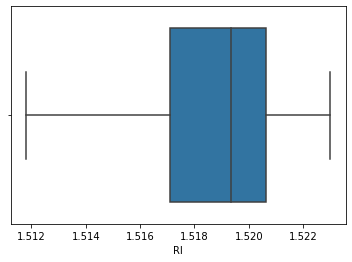

In [117]:
sns.boxplot(test["RI"])

####**Finding outlier from Na column**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


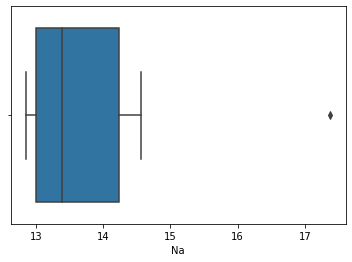

In [118]:
sns.boxplot(test["Na"])

####**Finding IQR**

In [119]:
percentile25 = test['Na'].quantile(0.25)
percentile75 = test['Na'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  13.0
75th percentile of the data is  14.23
IQR : 1.2300000000000004


####**Finding limits**

In [120]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

16.075000000000003
11.155


####**Capping Technique to remove outliers**

In [121]:
test['Na'] = np.where(
    test['Na']>max_value,
    max_value,
    np.where(
        test['Na']<min_value,
        min_value,
        test['Na']
    ) 
)
test['Na'].describe()

count    17.000000
mean     13.728529
std       0.854813
min      12.850000
25%      13.000000
50%      13.380000
75%      14.230000
max      16.075000
Name: Na, dtype: float64

#####**Boxplot after removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


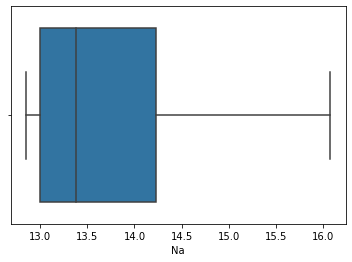

In [122]:
sns.boxplot(test["Na"])

####**Remove Outlier from Si column of test dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


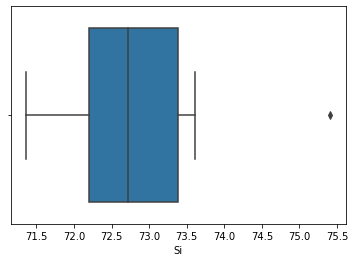

In [123]:
sns.boxplot(test["Si"])

####**Finding IQR**

In [124]:
percentile25 = test['Si'].quantile(0.25)
percentile75 = test['Si'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  72.2
75th percentile of the data is  73.39
IQR : 1.1899999999999977


####**Finding limits**

In [125]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

75.175
70.415


####**Apply capping technique to remove outliers**

In [126]:
test['Si'] = np.where(
    test['Si']>max_value,
    max_value,
    np.where(
        test['Si']<min_value,
        min_value,
        test['Si']
    ) 
)
test['Si'].describe()

count    17.000000
mean     72.835588
std       0.869993
min      71.360000
25%      72.200000
50%      72.720000
75%      73.390000
max      75.175000
Name: Si, dtype: float64

####**Boxplot after removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


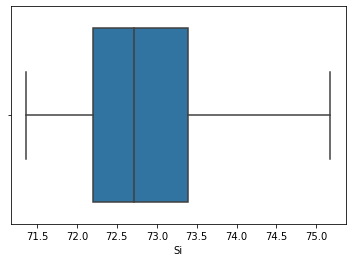

In [127]:
sns.boxplot(test["Si"])

####**Removing outliers from Ca column of test dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


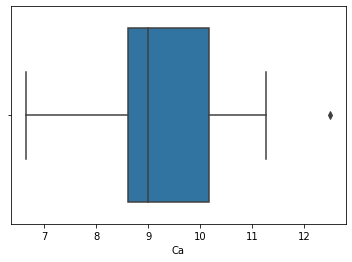

In [128]:
sns.boxplot(test["Ca"])

####**Finding IQR**

In [129]:
percentile25 = test['Ca'].quantile(0.25)
percentile75 = test['Ca'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  8.62
75th percentile of the data is  10.17
IQR : 1.5500000000000007


####**Finding limits**

In [130]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

12.495000000000001
6.294999999999998


####**Apply capping to remove outliers**

In [131]:
test['Ca'] = np.where(
    test['Ca']>max_value,
    max_value,
    np.where(
        test['Ca']<min_value,
        min_value,
        test['Ca']
    ) 
)
test['Ca'].describe()

count    17.000000
mean      9.437353
std       1.418712
min       6.650000
25%       8.620000
50%       8.990000
75%      10.170000
max      12.495000
Name: Ca, dtype: float64

####**After removing outliers from Ca**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


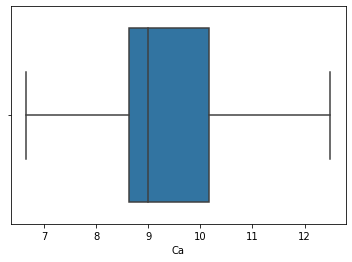

In [132]:
sns.boxplot(test["Ca"])

####**Finding Outliers from Ba column of test dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


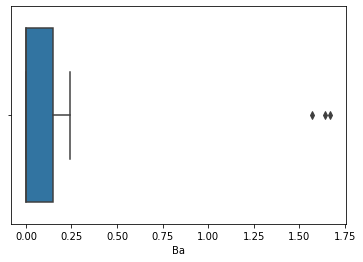

In [133]:
sns.boxplot(test["Ba"])

####**Finding IQR**

In [134]:
percentile25 = test['Ba'].quantile(0.25)
percentile75 = test['Ba'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  0.15
IQR : 0.15


####**Finding Limits**

In [135]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

0.375
-0.22499999999999998


In [136]:
test['Ba'] = np.where(
    test['Ba']>max_value,
    max_value,
    np.where(
        test['Ba']<min_value,
        min_value,
        test['Ba']
    ) 
)
test['Ba'].describe()

count    17.000000
mean      0.089118
std       0.151443
min       0.000000
25%       0.000000
50%       0.000000
75%       0.150000
max       0.375000
Name: Ba, dtype: float64

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


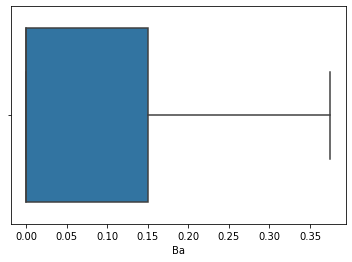

In [137]:
sns.boxplot(test["Ba"])

In [138]:
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


###**Finding Outliers from Train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


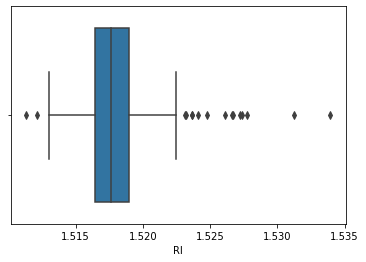

In [139]:
sns.boxplot(train["RI"])
#Si,K,Ca,Ba,Fe,Type of glass

####**Finding IQR**

In [140]:
percentile25 = train['RI'].quantile(0.25)
percentile75 = train['RI'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.516455
75th percentile of the data is  1.51895
IQR : 0.002494999999999914


####**Finding Limits**

In [141]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

1.5226924999999998
1.5127125000000001


####**Capping technique to remove outliers**

In [142]:
train['RI'] = np.where(
    train['RI']>max_value,
    max_value,
    np.where(
        train['RI']<min_value,
        min_value,
        train['RI']
    ) 
)
train['RI'].describe()

count    195.000000
mean       1.518025
std        0.002269
min        1.512713
25%        1.516455
50%        1.517630
75%        1.518950
max        1.522692
Name: RI, dtype: float64

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


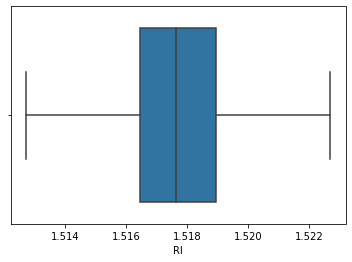

In [143]:
sns.boxplot(train["RI"])

####**Finding outliers from Na column in train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


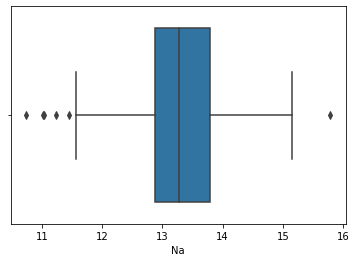

In [144]:
sns.boxplot(train["Na"])

####**Finding IQR**

In [145]:
percentile25 = train['Na'].quantile(0.25)
percentile75 = train['Na'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  12.875
75th percentile of the data is  13.795
IQR : 0.9199999999999999


####**Finding Limits**

In [146]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

15.175
11.495000000000001


####**Cleaning Outliers By Using Capping Technique**

In [147]:
train['Na'] = np.where(
    train['Na']>max_value,
    max_value,
    np.where(
        train['Na']<min_value,
        min_value,
        train['Na']
    ) 
)
train['Na'].describe()

count    195.000000
mean      13.381026
std        0.746991
min       11.495000
25%       12.875000
50%       13.270000
75%       13.795000
max       15.175000
Name: Na, dtype: float64

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


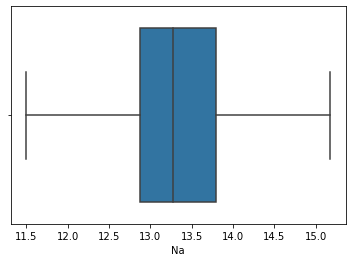

In [148]:
sns.boxplot(train["Na"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


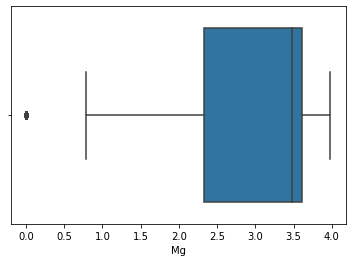

In [149]:
sns.boxplot(train["Mg"])

####**Finding IQR**

In [150]:
percentile25 = train['Mg'].quantile(0.25)
percentile75 = train['Mg'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  2.335
75th percentile of the data is  3.605
IQR : 1.27


####**Finding Limits**

In [151]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

5.51
0.42999999999999994


####**Capping technique to remove outliers**

In [152]:
train['Mg'] = np.where(
    train['Mg']>max_value,
    max_value,
    np.where(
        train['Mg']<min_value,
        min_value,
        train['Mg']
    ) 
)
train['Mg'].describe()

count    195.000000
mean       2.827282
std        1.238790
min        0.430000
25%        2.335000
50%        3.480000
75%        3.605000
max        3.980000
Name: Mg, dtype: float64

####**After removing Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


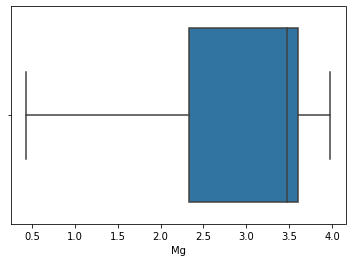

In [153]:
sns.boxplot(train["Mg"])

####**Remove Outliers from Mg column in train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


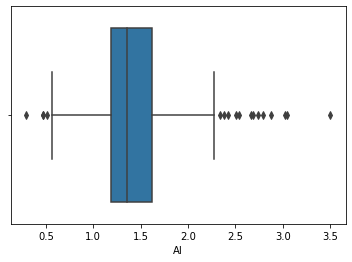

In [154]:
sns.boxplot(train["Al"])

####**Finding Outliers**

In [155]:
percentile25 = train['Al'].quantile(0.25)
percentile75 = train['Al'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.19
75th percentile of the data is  1.625
IQR : 0.43500000000000005


####**Finding Limits**

In [156]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

2.2775
0.5374999999999999


####**Capping to remove outliers**

In [157]:
train['Al'] = np.where(
    train['Al']>max_value,
    max_value,
    np.where(
        train['Al']<min_value,
        min_value,
        train['Al']
    ) 
)
train['Al'].describe()

count    195.000000
mean       1.428038
std        0.408830
min        0.537500
25%        1.190000
50%        1.360000
75%        1.625000
max        2.277500
Name: Al, dtype: float64

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


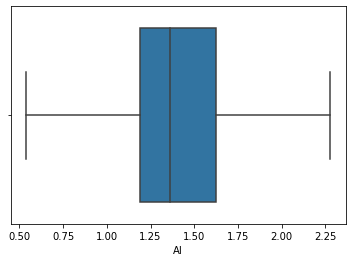

In [158]:
sns.boxplot(train["Al"])

####**Finding outliers from Si column in train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


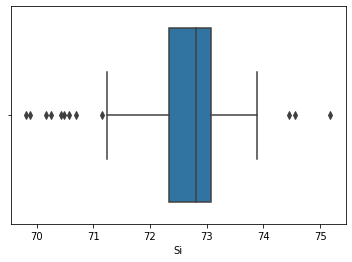

In [159]:
sns.boxplot(train["Si"])

####**Finding IQR**

In [160]:
percentile25 = train['Si'].quantile(0.25)
percentile75 = train['Si'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  72.33
75th percentile of the data is  73.08
IQR : 0.75


####**Finding Limits**

In [161]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

74.205
71.205


####**Capping technique to remove outliers**

In [162]:
train['Si'] = np.where(
    train['Si']>max_value,
    max_value,
    np.where(
        train['Si']<min_value,
        min_value,
        train['Si']
    ) 
)
train['Si'].describe()

count    195.000000
mean      72.669692
std        0.634441
min       71.205000
25%       72.330000
50%       72.810000
75%       73.080000
max       74.205000
Name: Si, dtype: float64

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


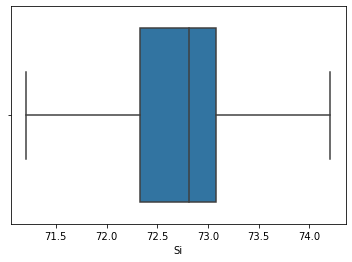

In [163]:
sns.boxplot(train["Si"])

####**Remove outliers from K column in train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


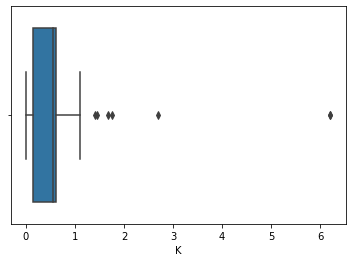

In [164]:
sns.boxplot(train["K"])

####**Finding IQR**

In [165]:
percentile25 = train['K'].quantile(0.25)
percentile75 = train['K'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.14500000000000002
75th percentile of the data is  0.61
IQR : 0.46499999999999997


####**Finding Limits**

In [166]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

1.3075
-0.5525


####**Apply capping to remove outliers**

In [167]:
train['K'] = np.where(
    train['K']>max_value,
    max_value,
    np.where(
        train['K']<min_value,
        min_value,
        train['K']
    ) 
)
train['K'].describe()

count    195.000000
mean       0.458782
std        0.301017
min        0.000000
25%        0.145000
50%        0.560000
75%        0.610000
max        1.307500
Name: K, dtype: float64

####**After removing Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


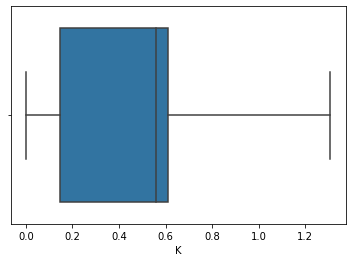

In [168]:
sns.boxplot(train["K"])

####**Remove Outliers from Ca column in train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


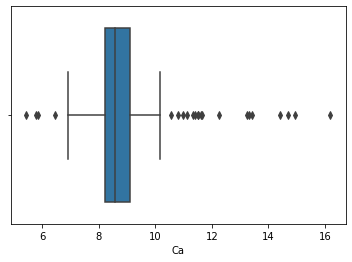

In [169]:
sns.boxplot(train["Ca"])

####**Finding IQR**

In [170]:
percentile25 = train['Ca'].quantile(0.25)
percentile75 = train['Ca'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  8.22
75th percentile of the data is  9.105
IQR : 0.8849999999999998


####**Finding limits**

In [171]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

10.432500000000001
6.892500000000001


####**Apply capping to remove outliers**

In [172]:
train['Ca'] = np.where(
    train['Ca']>max_value,
    max_value,
    np.where(
        train['Ca']<min_value,
        min_value,
        train['Ca']
    ) 
)
train['Ca'].describe()

count    195.000000
mean       8.741410
std        0.820701
min        6.892500
25%        8.220000
50%        8.570000
75%        9.105000
max       10.432500
Name: Ca, dtype: float64

####**After removing the outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


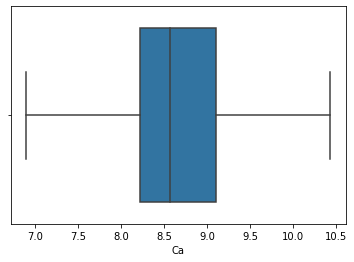

In [173]:
sns.boxplot(train["Ca"])

####**Remove outliers from Ba column of train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


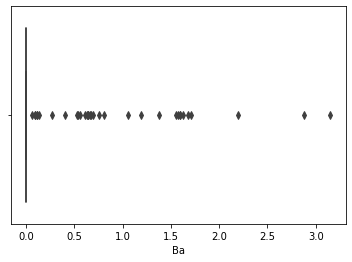

In [174]:
sns.boxplot(train["Ba"])

####**Finding IQR**

In [175]:
#percentile25 = train['Ba'].quantile(0.25)
#percentile75 = train['Ba'].quantile(0.75)
#print("25th percentile of the data is ",percentile25)
#print("75th percentile of the data is ",percentile75)
#print("IQR :", percentile75-percentile25)

####**Finding Limits**

In [176]:
#max_value = percentile75 + 1.5 * (percentile75-percentile25)
#min_value = percentile25 - 1.5 * (percentile75-percentile25)
#print(max_value)
#print(min_value)

####**Apply capping technique to remove outliers**

In [177]:
#train['Ba'] = np.where(
#    train['Ba']>max_value,
#    max_value,
#    np.where(
#        train['Ba']<min_value,
#        min_value,
#        train['Ba']
#    ) 
#)
#train['Ba'].describe()

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


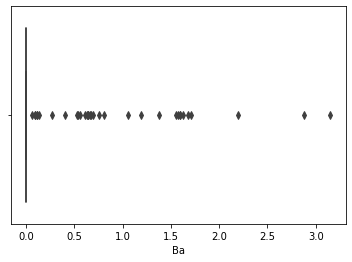

In [178]:
sns.boxplot(train["Ba"])

####**Finding outliers from Fe column in train dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


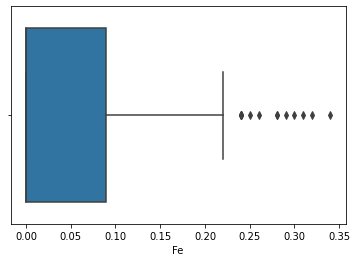

In [179]:
sns.boxplot(train["Fe"])

####**Finding the IQR**

In [180]:
percentile25 = train['Fe'].quantile(0.25)
percentile75 = train['Fe'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  0.0
75th percentile of the data is  0.09
IQR : 0.09


####**Finding Limits**

In [181]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

0.225
-0.135


####**Apply capping technique to remove outliers**

In [182]:
train['Fe'] = np.where(
    train['Fe']>max_value,
    max_value,
    np.where(
        train['Fe']<min_value,
        min_value,
        train['Fe']
    ) 
)
train['Fe'].describe()

count    195.000000
mean       0.047026
std        0.077451
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.225000
Name: Fe, dtype: float64

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


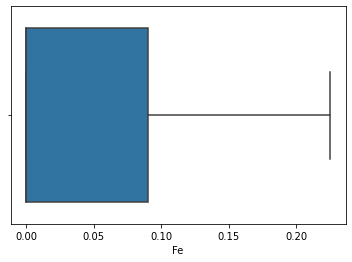

In [183]:
sns.boxplot(train["Fe"])

####**Removing outliers from Type of glass**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


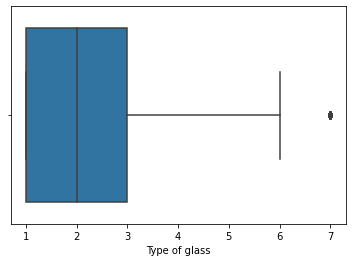

In [184]:
sns.boxplot(train["Type of glass"])

####**Finding IQR**

In [185]:
percentile25 = train['Type of glass'].quantile(0.25)
percentile75 = train['Type of glass'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.0
75th percentile of the data is  3.0
IQR : 2.0


####**Finding limits**

In [186]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

6.0
-2.0


####**Capping technique to remove outliers**

In [187]:
train['Type of glass'] = np.where(
    train['Type of glass']>max_value,
   max_value,
    np.where(
        train['Type of glass']<min_value,
        min_value,
        train['Type of glass']
    ) 
)
train['Type of glass'].describe()

count    195.000000
mean       2.543590
std        1.794004
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: Type of glass, dtype: float64

####**After removing outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


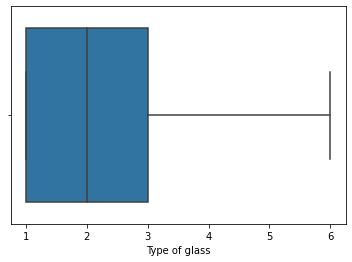

In [188]:
sns.boxplot(train["Type of glass"])

In [189]:
def standardize (df):
    for col in df.columns:
        if col != "Type of glass": # Don't standardize the categories
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [190]:
# Standardize data
train = standardize(train)
test = standardize(test)
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,-0.183017,0.681366,0.623768,-0.166422,0.095056,0.070487,-1.110527,-0.339452,-0.607170,1.0
1,-0.813380,0.199433,0.583406,0.273859,0.504866,-0.228499,-1.171450,-0.339452,-0.607170,1.0
2,-0.160976,-0.228953,0.696420,-0.337643,-0.094086,0.369474,-0.635323,-0.339452,-0.607170,1.0
3,-0.266771,-0.148630,0.639913,-0.459943,0.646723,0.303032,-0.818094,-0.339452,-0.607170,1.0
4,-0.910359,-0.791208,0.631841,0.469539,0.473342,0.602019,-0.818094,-0.339452,2.297911,1.0


####**Import libraries**

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance

In [199]:
# k = 4 neighbors
euclid_model = KNeighborsClassifier(n_neighbors=4, metric=distance.sqeuclidean) # Square Euclidean distance model
manhattan_model = KNeighborsClassifier(n_neighbors=4, metric=distance.cityblock) # Manhattan distance model
x_train = train.drop(["Type of glass"], axis=1)
y_train = train["Type of glass"]
euclid_model.fit(x_train,y_train) # Train models
manhattan_model.fit(x_train, y_train)
x_test = test.drop("Type of glass", axis=1) 
y_test = test["Type of glass"]

###**Make predictions**

In [200]:
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1.0,1.0
1,1,1.0,1.0
2,2,2.0,2.0
3,2,2.0,2.0
4,2,1.0,1.0


####**Evaluate performance**

In [202]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
#print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 52.94%
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         3
           7       0.00      0.00      0.00         3

    accuracy                           0.53        17
   macro avg       0.42      0.56      0.45        17
weighted avg       0.40      0.53      0.43        17

Square Euclidean Accuracy: 41.18%
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.40      0.67      0.50         3
           7       0.00      0.00      0.00         3

    accuracy    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

####**Accuracy By using Manhattan : 52.94%**

####**Accuracy By using Square Euclidean : 41.18%**

####**As we can see Acuracy using Manhattan is greater than the accuracy using Euclidean**